<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 185.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 189.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 119.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 146.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 112.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 177.3 MB/s eta 0:00:00


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### 

Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
## Write your code here
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None


In [4]:
print(df['MainBranch'].unique())

['I am a developer by profession' 'I am learning to code'
 'I code primarily as a hobby'
 'I am not primarily a developer, but I write code sometimes as part of my work/studies'
 'I used to be a developer by profession, but no longer am']


In [5]:
print(df['Age'].unique())

['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


In [7]:
# 定义分类函数
def categorize_employment(status):
    if 'Employed' in status:
        return 'Employed'
    elif 'Independent contractor, freelancer, or self-employed' in status:
        return 'Self-Employed'
    elif 'Student' in status:
        return 'Student'
    elif 'Not employed' in status:
        return 'Unemployed'
    elif 'Retired' in status:
        return 'Retired'
    else:
        return 'Other'

# 应用分类函数
df['Employment_Category'] = df['Employment'].apply(categorize_employment)

# 查看分类后的唯一值
print(df['Employment_Category'].unique())

['Employed' 'Student' 'Self-Employed' 'Unemployed' 'Other' 'Retired']


In [8]:
print(df['RemoteWork'].unique())

['Remote' nan 'In-person' 'Hybrid (some remote, some in-person)']


In [9]:
print(df['Check'].unique())

['Apples']


In [10]:
print(df['EdLevel'].unique())

['Primary/elementary school'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Some college/university study without earning a degree'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)'
 'Associate degree (A.A., A.S., etc.)' 'Something else' nan]


In [13]:
print(df['LearnCodeOnline'].nunique())

10853


In [15]:
print(df['JobSat'].unique())

[nan  8.  5. 10.  6.  9.  4.  7.  3.  2.  1.  0.]


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [16]:
## Write your code here
df.isnull().sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Employment_Category        0
Length: 115, dtype: int64

In [17]:
df[df.duplicated()].count()

ResponseId             0
MainBranch             0
Age                    0
Employment             0
RemoteWork             0
                      ..
SurveyLength           0
SurveyEase             0
ConvertedCompYearly    0
JobSat                 0
Employment_Category    0
Length: 115, dtype: int64

In [18]:
print(df['JobSat'].isnull().sum())
print(df['YearsCodePro'].isnull().sum())

36311
13827


In [19]:
avg_JobSat = df['JobSat'].mean().round()
print(avg_JobSat)
df['JobSat'].fillna(avg_JobSat,inplace=True)

7.0


/tmp/ipykernel_300/2700067664.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobSat'].fillna(avg_JobSat,inplace=True)


In [58]:
df['YearsCodePro'].replace('Less than 1 year',0.5,inplace = True)
df['YearsCodePro'].replace('More than 50 years',55,inplace = True)

avg_YearsCodePro = df['YearsCodePro'].astype('float').mean().round()
df['YearsCodePro'].fillna(avg_YearsCodePro,inplace = True)

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [24]:
print(df['Employment_Category'].unique())

['Employed' 'Student' 'Self-Employed' 'Unemployed' 'Other' 'Retired']


In [25]:
## Write your code here
print(df['Employment_Category'].value_counts())

Employment_Category
Employed         48801
Student           6482
Self-Employed     6047
Unemployed        3036
Other              546
Retired            525
Name: count, dtype: int64


In [26]:
print(df['JobSat'].value_counts())

JobSat
7.0     42690
8.0      7509
6.0      3751
9.0      3626
10.0     2251
5.0      1956
3.0      1165
4.0      1130
2.0       772
0.0       311
1.0       276
Name: count, dtype: int64


In [27]:
print(df['YearsCodePro'].value_counts())

YearsCodePro
10.0    13827
2        4168
3        4093
5        3526
10       3251
4        3215
0.5      2856
6        2843
1        2639
8        2549
7        2517
12       1777
15       1635
20       1549
9        1493
11       1312
13       1127
14       1082
25        998
16        946
18        867
17        814
30        689
24        632
19        516
22        492
23        448
26        426
27        380
21        380
28        342
35        285
29        196
40        194
32        194
34        169
38        134
33        132
36        119
31        106
37        104
45         56
42         55
39         54
41         51
55         50
44         42
43         37
46         21
50         14
48         14
49         11
47         10
Name: count, dtype: int64


### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


In [32]:
import matplotlib.font_manager

# 获取所有可用字体
fonts = sorted({f.name for f in matplotlib.font_manager.fontManager.ttflist})

# 打印所有可用字体
for font in fonts:
    print(font)

DejaVu Math TeX Gyre
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif Display
Inconsolata
Liberation Mono
Liberation Sans
Liberation Serif
STIXGeneral
STIXNonUnicode
STIXSizeFiveSym
STIXSizeFourSym
STIXSizeOneSym
STIXSizeThreeSym
STIXSizeTwoSym
Source Code Pro
Ubuntu
Ubuntu Condensed
Ubuntu Mono
cmb10
cmex10
cmmi10
cmr10
cmss10
cmsy10
cmtt10


In [33]:
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Liberation Sans']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

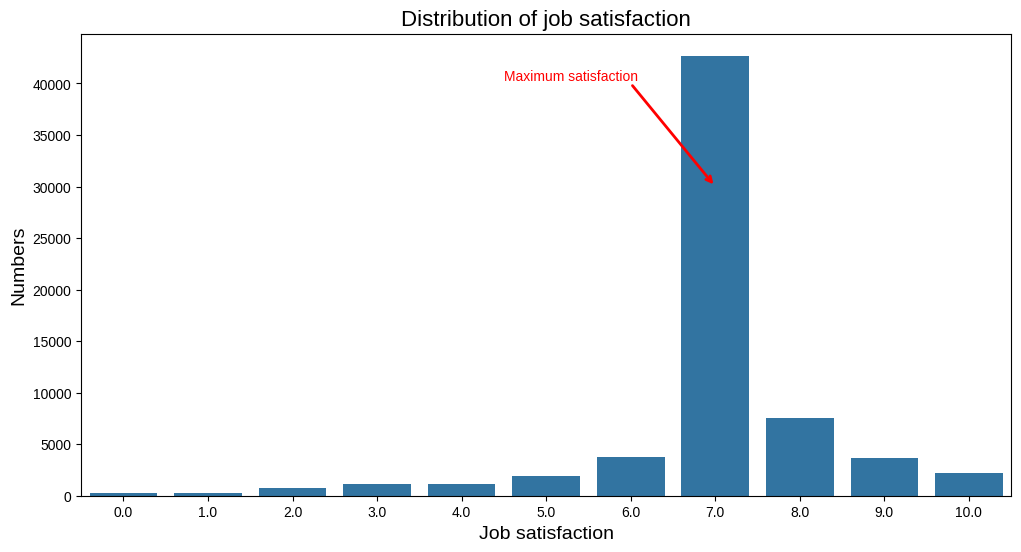

In [39]:
## Write your code here
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='JobSat', data=df)

plt.annotate('', xy=(7.0, 30000), xytext=(6.0, 40000), xycoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2))
plt.annotate('Maximum satisfaction', xy=(4.5, 40000), va='bottom', ha='left', color='red') 

# 设置标题和标签
plt.title('Distribution of job satisfaction', fontsize=16)
plt.xlabel('Job satisfaction', fontsize=14)
plt.ylabel('Numbers', fontsize=14)

# 显示图形
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [40]:
## Write your code here
print(df['LanguageHaveWorkedWith'].nunique())

23864


In [41]:
print(df['LanguageWantToWorkWith'].nunique())

22769


In [42]:
print(df['LanguageHaveWorkedWith'].unique())

[nan
 'Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Python;TypeScript'
 'C#' ...
 'Bash/Shell (all shells);C;C#;C++;Delphi;Groovy;HTML/CSS;Java;JavaScript;Objective-C;PowerShell;Python;SQL;Swift;TypeScript'
 'C;C++;Go;Lua;Objective-C;Python;Rust;SQL'
 'C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript']


In [43]:
from collections import Counter

In [46]:
# 处理缺失值并分割字符串
languages_list = df['LanguageHaveWorkedWith'].dropna().str.split(';').explode()

# 统计频率
language_frequency = languages_list.value_counts()

# 打印结果
print(language_frequency)

LanguageHaveWorkedWith
JavaScript                 37492
HTML/CSS                   31816
Python                     30719
SQL                        30682
TypeScript                 23150
Bash/Shell (all shells)    20412
Java                       18239
C#                         16318
C++                        13827
C                          12184
PHP                        10951
PowerShell                  8328
Go                          8103
Rust                        7559
Kotlin                      5665
Lua                         3728
Dart                        3594
Assembly                    3233
Ruby                        3147
Swift                       2829
R                           2595
Visual Basic (.Net)         2499
MATLAB                      2378
VBA                         2248
Groovy                      2004
Scala                       1547
Perl                        1482
GDScript                    1402
Objective-C                 1283
Elixir              

In [47]:
languages_list2 = df['LanguageWantToWorkWith'].dropna().str.split(';').explode()

language_frequency2 = languages_list2.value_counts()

print(language_frequency2)

LanguageWantToWorkWith
Python                     25047
JavaScript                 23774
SQL                        22400
HTML/CSS                   20721
TypeScript                 20239
Rust                       17232
Go                         13837
Bash/Shell (all shells)    13744
C#                         12921
C++                        10873
Java                       10668
C                           8275
Kotlin                      7379
PHP                         5745
PowerShell                  4287
Swift                       3877
Dart                        3709
Zig                         3688
Lua                         3322
Assembly                    3007
Elixir                      2895
Ruby                        2774
Haskell                     2221
R                           2177
Scala                       1790
GDScript                    1667
Clojure                     1331
F#                          1272
Julia                       1263
Lisp                

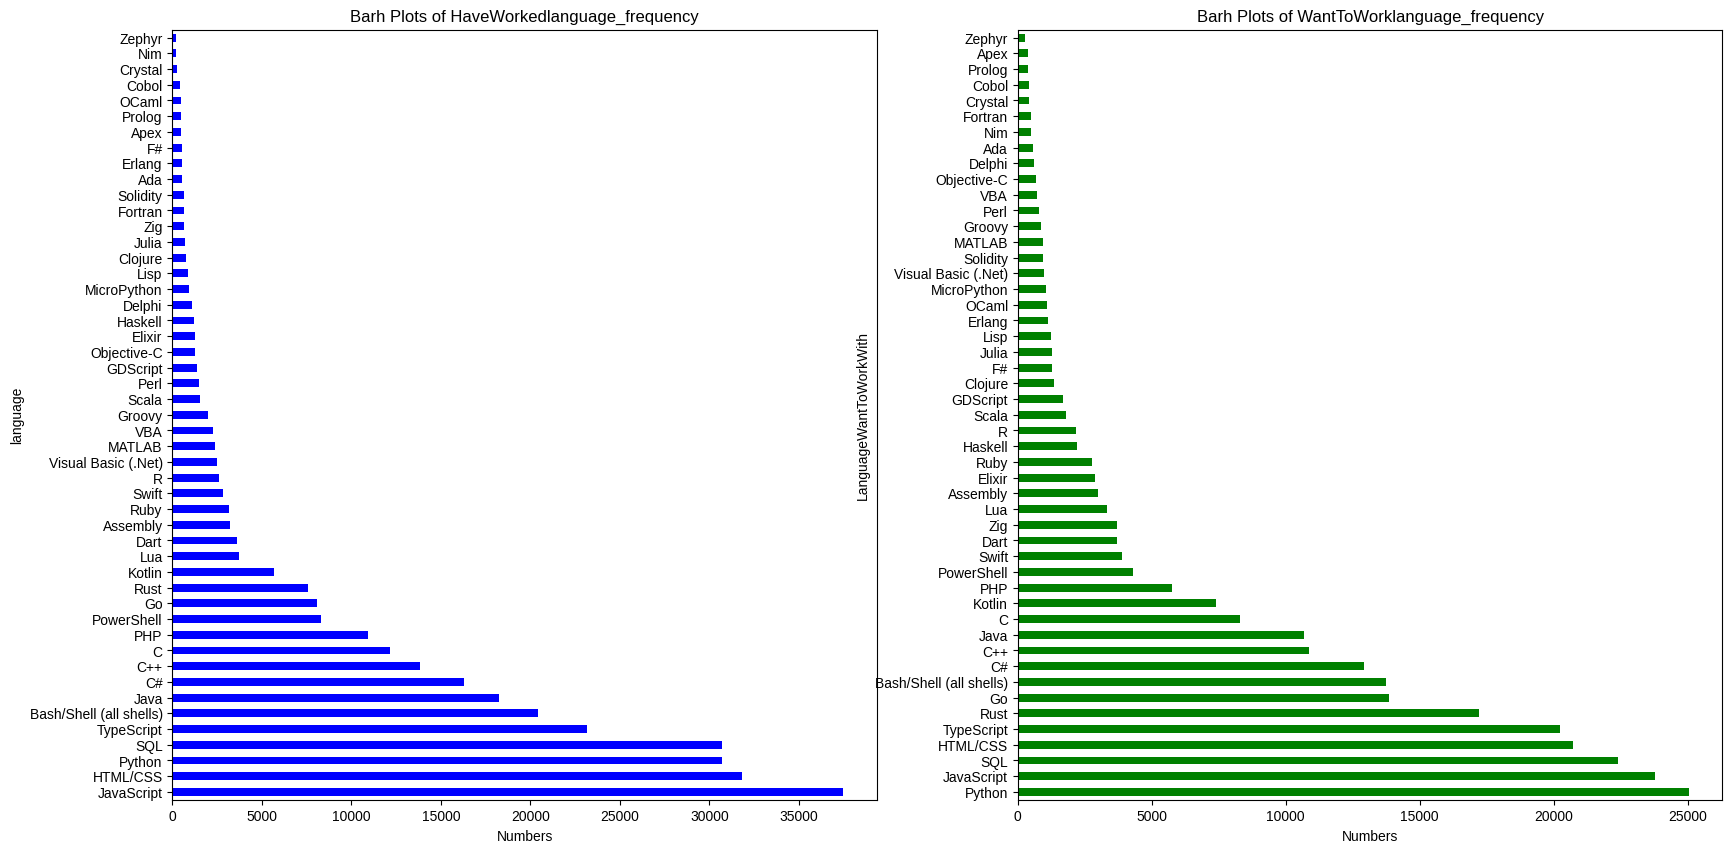

In [50]:
fig = plt.figure() 

ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2) 

language_frequency.plot(kind='barh', color='blue', figsize=(20, 10), ax=ax0) 
ax0.set_title('Barh Plots of HaveWorkedlanguage_frequency')
ax0.set_xlabel('Numbers')
ax0.set_ylabel('language')

# Subplot 2: Line plot
language_frequency2.plot(kind='barh', color='green', figsize=(20, 10), ax=ax1) 
ax1.set_title ('Barh Plots of WantToWorklanguage_frequency')
ax1.set_xlabel('Numbers')

plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [51]:
print(df['RemoteWork'].unique())

['Remote' nan 'In-person' 'Hybrid (some remote, some in-person)']


<Axes: xlabel='RemoteWork', ylabel='count'>

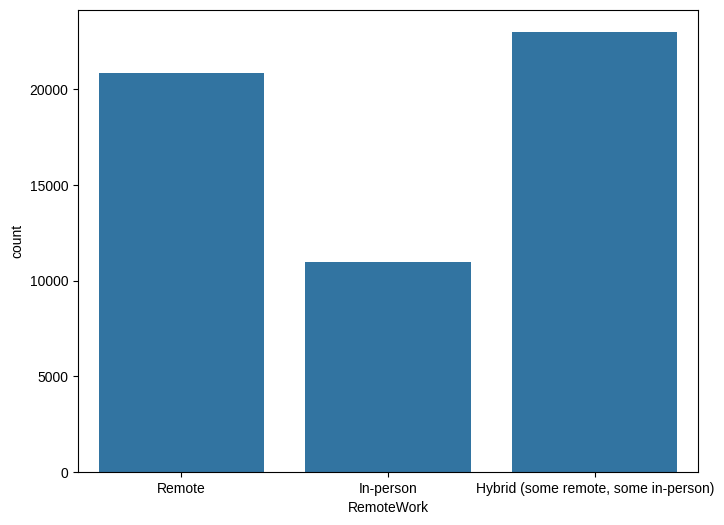

In [53]:
## Write your code here
plt.figure(figsize=(8, 6))
sns.countplot(x='RemoteWork', data=df)

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [55]:
print(df['JobSat'].unique())

[ 7.  8.  5. 10.  6.  9.  4.  3.  2.  1.  0.]


In [61]:
df['YearsCodePro'].replace(10.0,'10',inplace = True)

In [62]:
print(df['YearsCodePro'].unique())

['10' '17' '27' '7' '11' '25' '12' '3' 0.5 '18' '37' '15' '20' '6' '2'
 '16' '8' '14' '4' '45' '1' '24' '29' '5' '30' '26' '9' '33' '13' '35'
 '23' '22' '31' '19' '21' '28' '34' '32' '40' '50' '39' '44' '42' '41'
 '36' '38' 55 '43' '47' '48' '46' '49']


In [66]:
# 尝试将'JobSat'列转换为浮点数
# 使用pd.to_numeric并设置errors='coerce'来处理无法转换的值
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# 打印唯一值
unique_values = df['JobSat'].unique()
print("唯一值:", unique_values)

唯一值: [ 7.  8.  5. 10.  6.  9.  4.  3.  2.  1.  0.]


In [68]:
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# 打印唯一值
unique_values = df['YearsCodePro'].unique()
print("唯一值:", unique_values)

唯一值: [10.  17.  27.   7.  11.  25.  12.   3.   0.5 18.  37.  15.  20.   6.
  2.  16.   8.  14.   4.  45.   1.  24.  29.   5.  30.  26.   9.  33.
 13.  35.  23.  22.  31.  19.  21.  28.  34.  32.  40.  50.  39.  44.
 42.  41.  36.  38.  55.  43.  47.  48.  46.  49. ]


(0.0, 10.5)

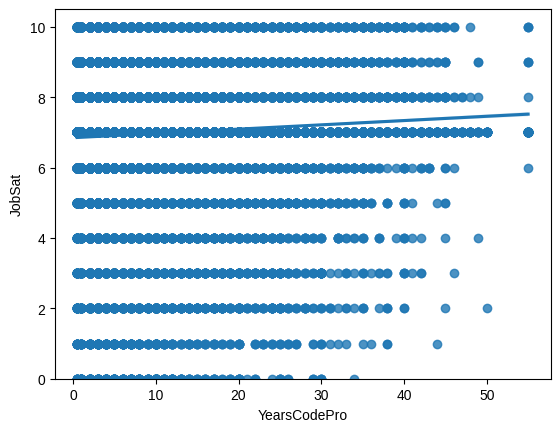

In [69]:
sns.regplot(x="YearsCodePro", y="JobSat", data=df)
plt.ylim(0,)

In [70]:
df[["YearsCodePro", "JobSat"]].corr()

,YearsCodePro,JobSat
YearsCodePro,1.000000,0.070532
JobSat,0.070532,1.000000


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [72]:
print(df['Employment_Category'].unique())

['Employed' 'Student' 'Self-Employed' 'Unemployed' 'Other' 'Retired']


In [73]:
print(df['EdLevel'].unique())

['Primary/elementary school'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Some college/university study without earning a degree'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)'
 'Associate degree (A.A., A.S., etc.)' 'Something else' nan]


In [74]:
# 创建交叉表
cross_tab = pd.crosstab(df['Employment_Category'], df['EdLevel'])

# 打印交叉表
print("交叉表:")
print(cross_tab)

交叉表:
EdLevel              Associate degree (A.A., A.S., etc.)  \
Employment_Category                                        
Employed                                            1372   
Other                                                  9   
Retired                                               18   
Self-Employed                                        182   
Student                                              127   
Unemployed                                            85   

EdLevel              Bachelor’s degree (B.A., B.S., B.Eng., etc.)  \
Employment_Category                                                 
Employed                                                    20282   
Other                                                          96   
Retired                                                       158   
Self-Employed                                                1947   
Student                                                      1309   
Unemployed                     

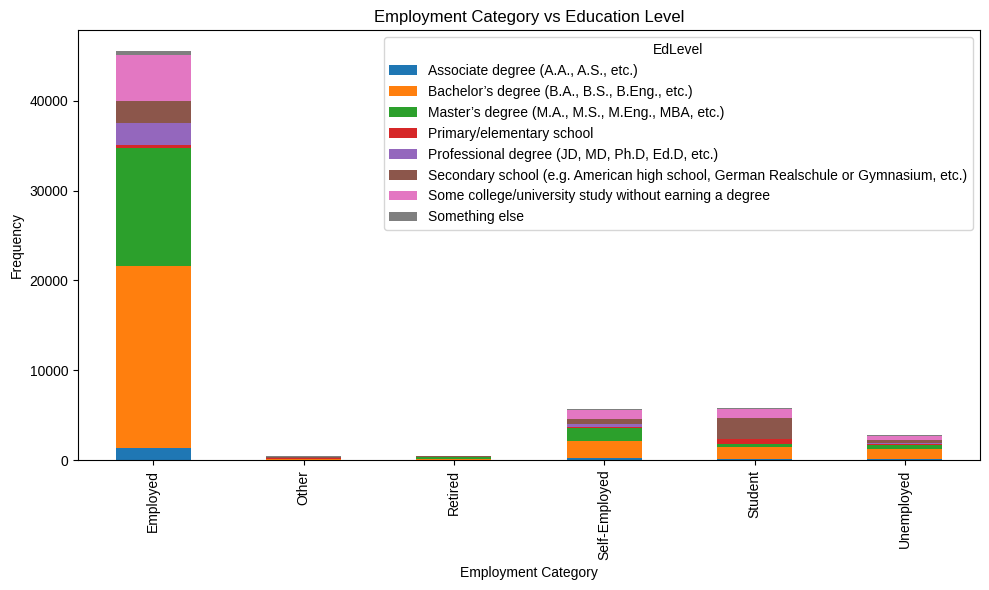

In [75]:
# 绘制堆积条形图
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))

# 添加标题和标签
ax.set_title('Employment Category vs Education Level')
ax.set_xlabel('Employment Category')
ax.set_ylabel('Frequency')

# 显示图形
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
